# Preparing

In [30]:
import pandas as pd

data=pd.read_csv("heart.csv")
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [31]:
metrics_all={1:"r2_score", 2:"acc", 3:"rmse", 4:"re"}
metrics_now={1,2,3,4}


# FE&EDA

## FE

In [32]:
def fe_creation(df):
    df['age2']=df['age']//10
    df['trestbps2']=df['trestbps']//10
    df['chol2'] = df['chol']//40
    df['thalach2'] = df['thalach']//20
    df['oldpeak2'] = df['oldpeak']//0.4
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang','thal', ]:
        for j in ['cp','trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'slope', 'ca']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

data=fe_creation(data)

In [33]:
categorical_columns=[]
numerics=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

features=data.columns.values.tolist()

for col in features:
    if data[col].dtype in numerics: 
        continue
    else:
        categorical_columns.append(col)
categorical_columns

['sex_cp',
 'sex_trestbps2',
 'sex_chol2',
 'sex_thalach2',
 'sex_oldpeak2',
 'sex_slope',
 'sex_ca',
 'age2_cp',
 'age2_trestbps2',
 'age2_chol2',
 'age2_thalach2',
 'age2_oldpeak2',
 'age2_slope',
 'age2_ca',
 'fbs_cp',
 'fbs_trestbps2',
 'fbs_chol2',
 'fbs_thalach2',
 'fbs_oldpeak2',
 'fbs_slope',
 'fbs_ca',
 'restecg_cp',
 'restecg_trestbps2',
 'restecg_chol2',
 'restecg_thalach2',
 'restecg_oldpeak2',
 'restecg_slope',
 'restecg_ca',
 'exang_cp',
 'exang_trestbps2',
 'exang_chol2',
 'exang_thalach2',
 'exang_oldpeak2',
 'exang_slope',
 'exang_ca',
 'thal_cp',
 'thal_trestbps2',
 'thal_chol2',
 'thal_thalach2',
 'thal_oldpeak2',
 'thal_slope',
 'thal_ca']

In [34]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    if col in data.columns:
        le=LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col]=le.transform(list(data[col].astype(str).values))

## EDA

In [35]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,7.594059,2.379538,2.363036,8.231023,14.320132,11.613861,13.841584,15.805281,7.339934,7.389439
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,7.692146,1.385059,2.668225,2.464200,6.131006,5.116465,3.904657,7.187994,1.875237,3.165442
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,1.000000,0.000000,7.000000,10.000000,8.000000,12.000000,10.000000,6.000000,5.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,5.000000,2.000000,1.000000,8.000000,12.000000,10.000000,13.000000,13.000000,7.000000,6.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,13.000000,4.000000,5.000000,10.000000,20.000000,17.000000,17.000000,22.500000,9.000000,10.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,24.000000,5.000000,9.000000,13.000000,29.000000,20.000000,20.000000,31.000000,10.000000,14.000000


# Preparing of model

In [36]:
X=data.drop("target", axis=1)
y=data["target"]

In [37]:
from sklearn.model_selection import train_test_split
X_train_b, y_train_b, X_test_b, y_test_b=train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1=MinMaxScaler()
X=pd.DataFrame(scaler1.fit_transform(X), columns=X.columns)
scaler2=StandardScaler()
X=pd.DataFrame(scaler2.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,...,0.052861,-1.720847,-0.887086,-1.313355,-1.686054,-1.882113,-2.268115,-1.087674,-2.852316,-2.021838
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,...,0.443514,-1.720847,-0.887086,-0.093907,-0.542427,-0.511718,0.040638,0.305836,-1.249871,-0.756100
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,...,-0.207575,-0.274476,-0.887086,-0.500389,-0.542427,-0.707488,-0.215890,-0.390919,-0.181575,-0.756100


In [40]:
import numpy as np
num_models=20
acc_train=[]
acc_test=[]
acc_all=np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [41]:
acc_all_pred=np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

[[], [], [], []]

In [42]:
from sklearn.model_selection import ShuffleSplit

cv_train=ShuffleSplit(n_splits=2, test_size=0.2, random_state=10)

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn import metrics

def acc_d(y, y_pred):
    return mean_absolute_error(y, y_pred)*len(y)/sum(abs(y))

def acc_rmse(y, y_pred):
    return (mean_squared_error(y, y_pred))**0.5

def acc_metrics_calc(num, model, X_train, X_test, y_train, y_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    y_train_pred = model.predict(X_train).astype(int)
    y_test_pred = model.predict(X_test).astype(int)
    if num != 17:
        print('target = ', y_train[:5].values)
        print('ytrain = ', y_train_pred[:5])
        print('target_test =', y_test[:5].values)
        print('ytest =', y_test_pred[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(y_train, y_train_pred) * 100, 2)
            acc_test = round(r2_score(y_test, y_test_pred) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(y_train, y_train_pred) * 100, 2)
            acc_test = round(metrics.accuracy_score(y_test, y_test_pred) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(y_train, y_train_pred) * 100, 2)
            acc_test = round(acc_rmse(y_test, y_test_pred) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(y_train, y_train_pred) * 100, 2)
            acc_test = round(acc_d(y_test, y_test_pred) * 100, 2)
            
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2

In [44]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission["target"] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)  

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y , cv=None, axes=None, ylim=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), random_state=0):
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=2, test_size=0.2, random_state=10)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

## Linear Model

In [46]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.model_selection import GridSearchCV

linreg=LinearRegression()
linreg_CV=GridSearchCV(linreg, param_grid={}, cv=cv_train, verbose=False)
linreg_CV.fit(X_train, y_train)
acc_metrics_calc(0, linreg_CV, X_train, X_test, y_train, y_test)

target =  [0 1 0 1 1]
ytrain =  [0 0 0 0 0]
target_test = [0 0 0 1 0]
ytest = [0 0 0 0 0]
acc of r2_score for train = -85.93
acc of r2_score for test = -54.18
acc of acc for train = 54.55
acc of acc for test = 62.3
acc of rmse for train = 67.42
acc of rmse for test = 61.4
acc of re for train = 79.14
acc of re for test = 88.46


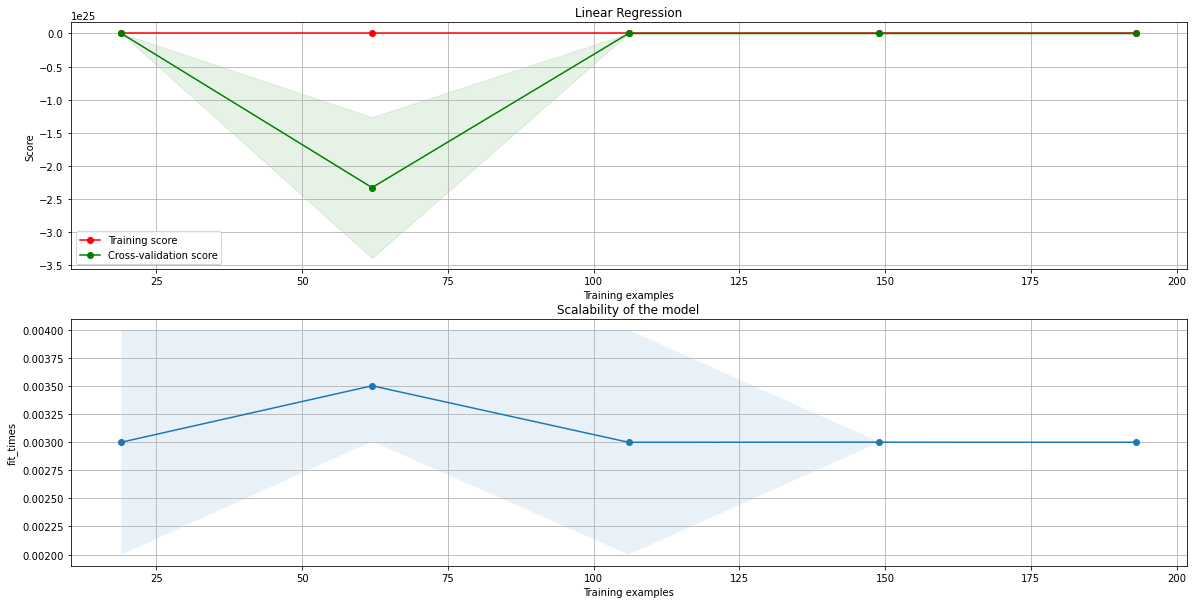

In [47]:

plot_learning_curve(linreg, "Linear Regression", X_train, y_train, cv=cv_train)

## SVM

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svr=SVC()
svr_CV=GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'tol': [1e-3]},
                   cv=cv_train, verbose=False)
svr_CV.fit(X_train, y_train)
print(svr_CV.best_params_)
acc_metrics_calc(1, svr_CV, X_train, X_test, y_train, y_test)

{'kernel': 'sigmoid', 'tol': 0.001}
target =  [0 1 0 1 1]
ytrain =  [1 1 0 1 1]
target_test = [0 0 0 1 0]
ytest = [0 1 0 1 0]
acc of r2_score for train = 15.49
acc of r2_score for test = 12.86
acc of acc for train = 79.34
acc of acc for test = 78.69
acc of rmse for train = 45.45
acc of rmse for test = 46.16
acc of re for train = 35.97
acc of re for test = 50.0


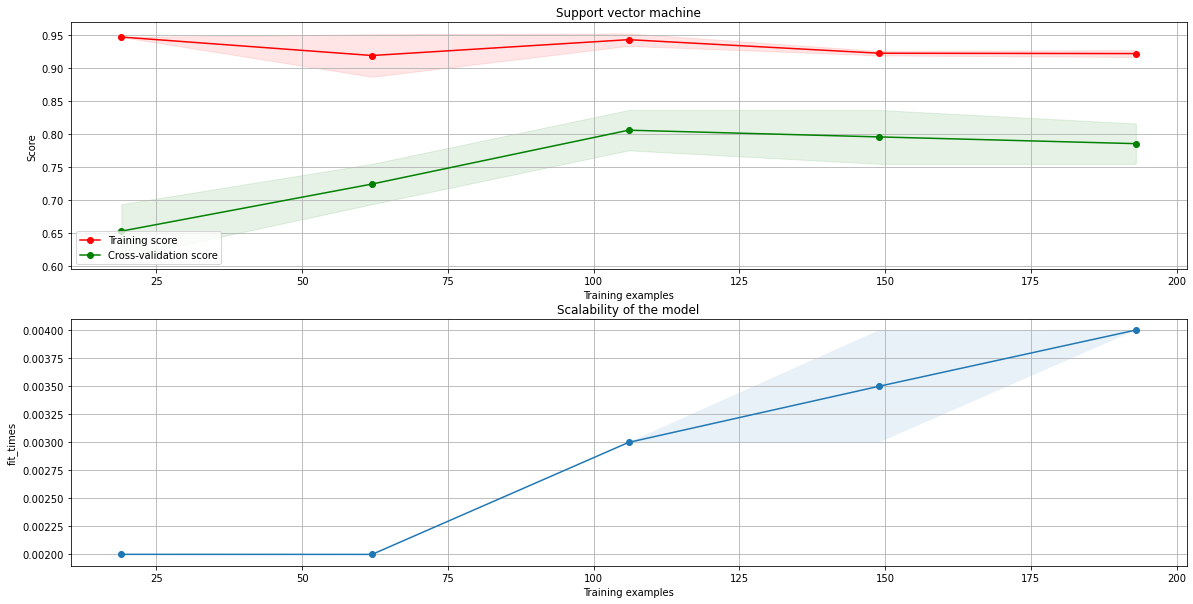

In [49]:
plot_learning_curve(svr, "Support vector machine", X_train, y_train, cv=cv_train)

## Linear SVC

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

linear_svc=LinearSVC()
param_grid={"dual":[False], "C":np.linspace(1,15,15)}
linear_svc_CV=GridSearchCV(linear_svc, param_grid=param_grid, cv=cv_train, verbose=False)
linear_svc_CV.fit(X_train, y_train)
print(linear_svc_CV.best_params_)
acc_metrics_calc(2, linear_svc_CV, X_train, X_test, y_train, y_test)

{'C': 1.0, 'dual': False}
target =  [0 1 0 1 1]
ytrain =  [1 1 0 1 1]
target_test = [0 0 0 1 0]
ytest = [0 0 0 1 0]
acc of r2_score for train = 50.98
acc of r2_score for test = 19.56
acc of acc for train = 88.02
acc of acc for test = 80.33
acc of rmse for train = 34.62
acc of rmse for test = 44.35
acc of re for train = 20.86
acc of re for test = 46.15


C:\Anaconda\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


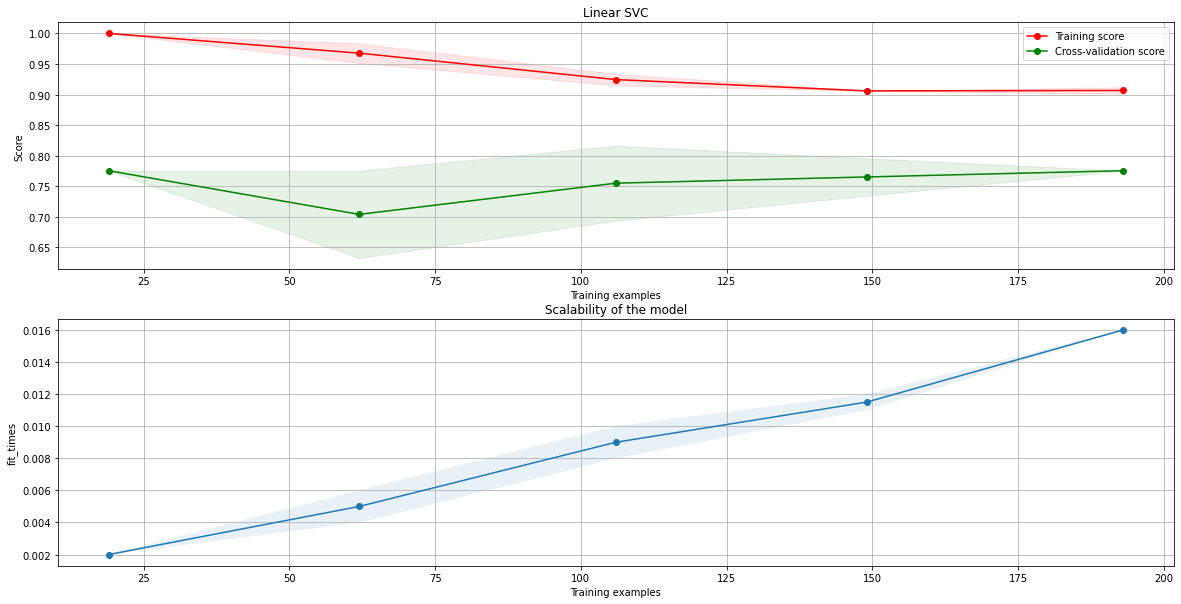

In [51]:
plot_learning_curve(linear_svc, "Linear SVC", X_train, y_train, cv=cv_train)

## MLP

In [52]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier()
param_grid={"hidden_layer_sizes":[i for i in range(2,5)],
           "solver":["sgd"],
            "learning_rate":['adaptive'],
            'max_iter':[1000]
           }
mlp_GS=GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(X_train, y_train)
print(mlp_GS.best_params_)
acc_metrics_calc(3, mlp_GS, X_train, X_test, y_train, y_test)

C:\Anaconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
target =  [0 1 0 1 1]
ytrain =  [1 1 0 1 1]
target_test = [0 0 0 1 0]
ytest = [0 0 0 1 0]
acc of r2_score for train = 44.22
acc of r2_score for test = 32.97
acc of acc for train = 86.36
acc of acc for test = 83.61
acc of rmse for train = 36.93
acc of rmse for test = 40.49
acc of re for train = 23.74
acc of re for test = 38.46


C:\Anaconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\A

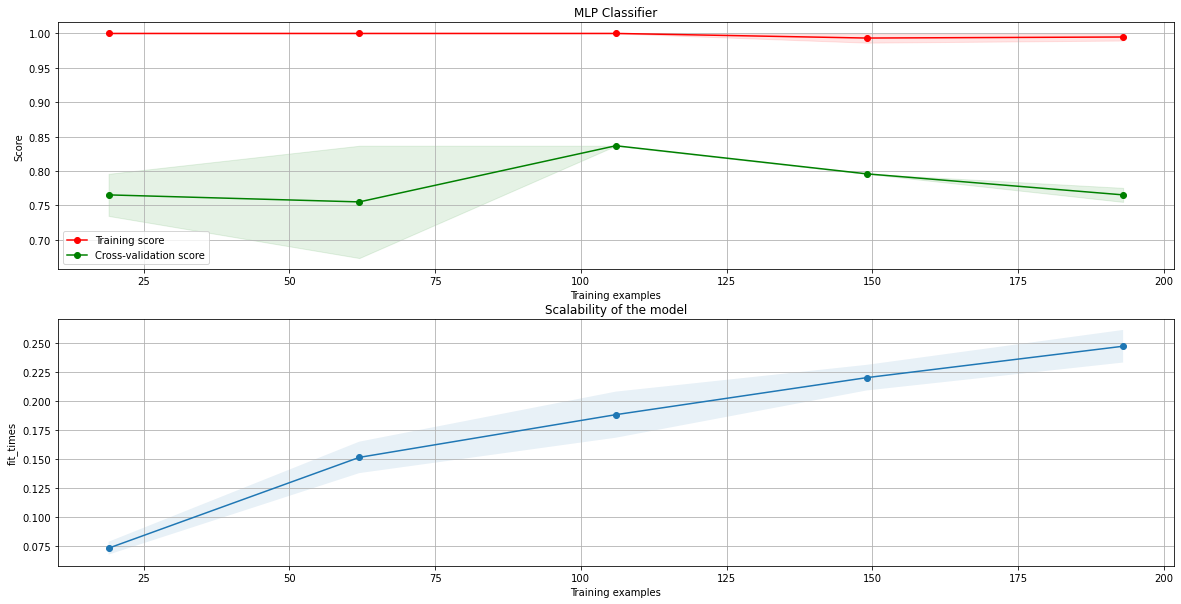

In [53]:
plot_learning_curve(mlp, "MLP Classifier", X_train, y_train, cv=cv_train)

## SGD

In [54]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(early_stopping=True)
param_grid={"alpha": [0.035, 0.04, 0.45]}
sgd_CV=GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False)
sgd_CV.fit(X_train, y_train)
print(sgd_CV.best_params_)
acc_metrics_calc(4, sgd_CV, X_train, X_test, y_train, y_test)

{'alpha': 0.45}
target =  [0 1 0 1 1]
ytrain =  [1 1 0 1 1]
target_test = [0 0 0 1 0]
ytest = [0 1 0 1 0]
acc of r2_score for train = 35.77
acc of r2_score for test = 12.86
acc of acc for train = 84.3
acc of acc for test = 78.69
acc of rmse for train = 39.63
acc of rmse for test = 46.16
acc of re for train = 27.34
acc of re for test = 50.0


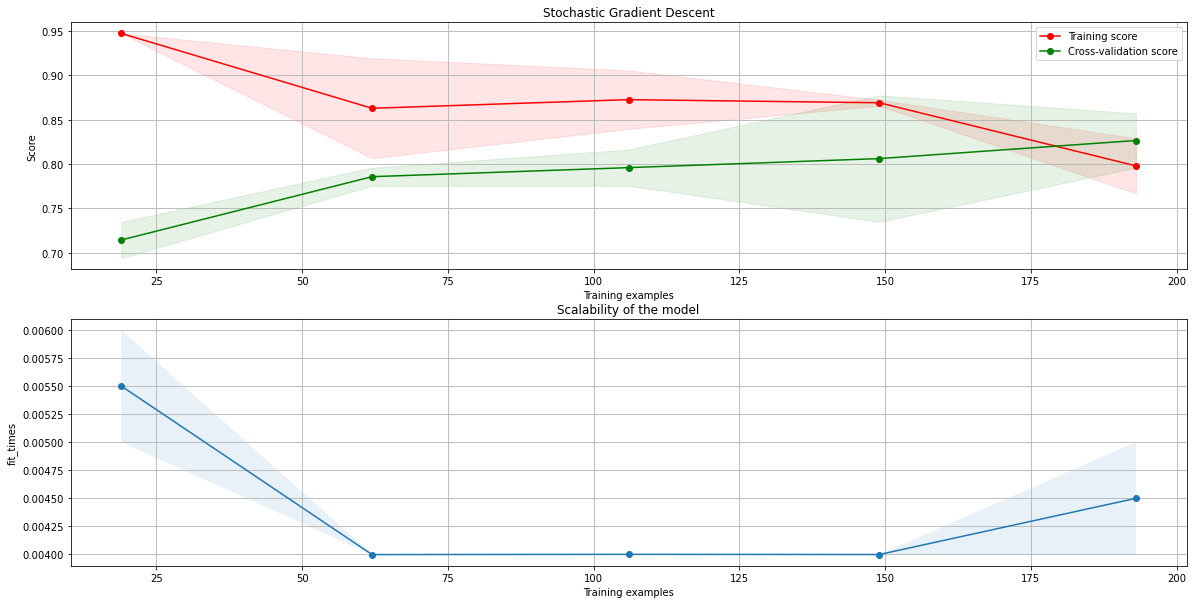

In [55]:
plot_learning_curve(sgd, "Stochastic Gradient Descent", X_train, y_train, cv=cv_train)

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
param_grid={"min_samples_leaf":[i for i in range(2,10)]}
decision_tree_CV=GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(X_train, y_train)
acc_metrics_calc(5,decision_tree_CV,X_train, X_test, y_train, y_test)

target =  [0 1 0 1 1]
ytrain =  [0 1 0 1 1]
target_test = [0 0 0 1 0]
ytest = [0 0 1 1 1]
acc of r2_score for train = 79.72
acc of r2_score for test = -34.07
acc of acc for train = 95.04
acc of acc for test = 67.21
acc of rmse for train = 22.27
acc of rmse for test = 57.26
acc of re for train = 8.63
acc of re for test = 76.92


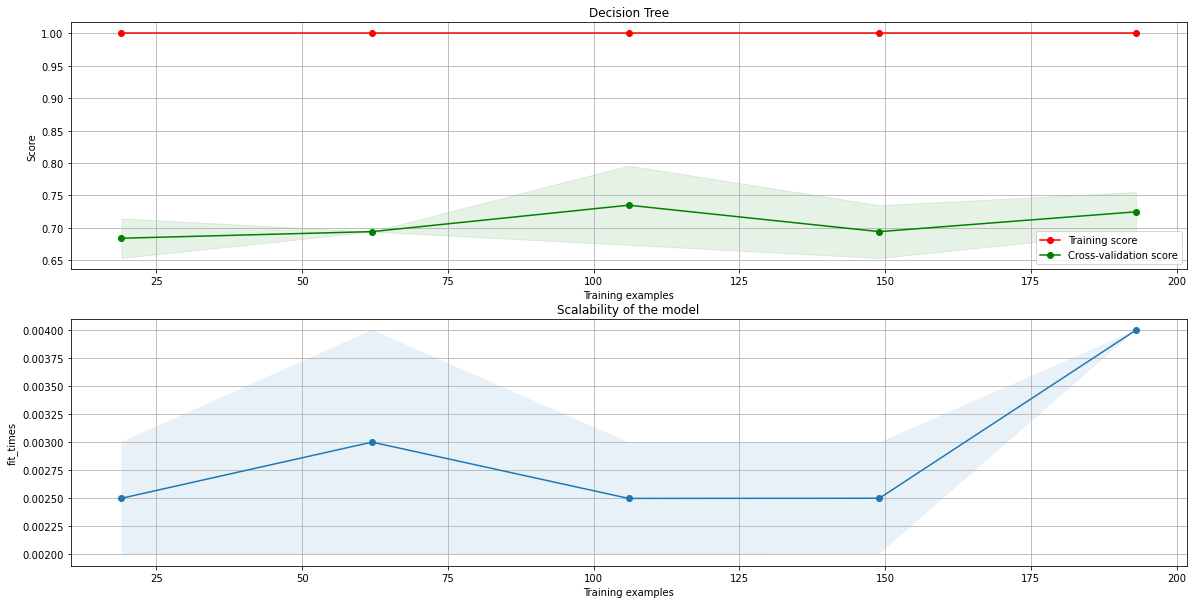

In [57]:
plot_learning_curve(decision_tree, "Decision Tree", X_train, y_train, cv=cv_train)

## NN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

def build_nn(optimizer='adam'):
    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(train0.columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

X_train_train, X_train_val, y_train_train, y_train_val=train_test_split(X_train, y_train, test_size=0.2, random_state=10)
nn_model=build_nn(optimizers.Adam(lr=0.0001))
nn_model.fit(X_train_train, y_train_train, batch_size=16, epochs=200, validation_data=(X_train_val, y_train_val))
acc_metrics_calc(6, nn_model, X_train, X_test, y_train, y_test)